In [1]:
# Run this cell to install pyarrow
!pip install pyarrow

In [2]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

NBA_parquet_file = '10%rand_samp_player_prop_final_dataset.parquet'

# Read the Parquet file
NBA_df = pd.read_parquet(NBA_parquet_file)

NBA_df.head(2)

,id,away_team,home_team,GAME_DATE,Player_ID,player_name,Game_ID,prop_market,prop_type,prop,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,Bet_outcome
0,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0
1,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0


In [6]:
NBA_df.columns

Index(['id', 'away_team', 'home_team', 'GAME_DATE', 'Player_ID', 'player_name',
       'Game_ID', 'prop_market', 'prop_type', 'prop', 'WL', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PLUS_MINUS', 'Bet_outcome'],
      dtype='object')

In [7]:
NBA_df.shape

(12300810, 32)

In [8]:
NBA_df['Bet_outcome'].value_counts()

Bet_outcome
1    6496564
0    5804246
Name: count, dtype: int64

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.callbacks import EarlyStopping  # Import EarlyStopping
# # Encode player names to integer indices
# label_encoder = LabelEncoder()
# player_indices = label_encoder.fit_transform(NBA_df['player_name'])
# # Determine the number of unique players
# num_players = len(label_encoder.classes_)
# # Prepare the target variable
# target = NBA_df['Bet_outcome'].values
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(player_indices, target, test_size=0.2, random_state=42)
# # Reshape the input data for embedding layer compatibility
# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# # Define the neural network model with an embedding layer
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=num_players, output_dim=50, input_length=1),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# # Compile the model with appropriate loss function and optimizer
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # Configure Early Stopping
# early_stopping_monitor = EarlyStopping(
#     monitor='val_loss',     # Monitor validation loss
#     patience=3,             # How many epochs to wait after min has been hit
#     verbose=1,              # Verbosity mode
#     mode='min',             # The direction is "minimizing" for loss
#     restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity.
# )
# # Train the model with the EarlyStopping callback
# model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stopping_monitor])
# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy:.2f}')

In [9]:
!pip install pandas numpy scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.7 MB/s eta 0:00:00a 0:00:01


In [12]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier, DMatrix, train, cv
# from sklearn.metrics import accuracy_score
# from joblib import dump

# # Assuming NBA_df is already loaded and prepared
# # Include more features here if available
# label_encoder = LabelEncoder()
# player_indices = label_encoder.fit_transform(NBA_df['player_name'])

# # Prepare the target variable
# target = NBA_df['Bet_outcome'].values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(player_indices, target, test_size=0.2, random_state=42)

# # Convert data to DMatrix object, which is optimized for XGBoost
# dtrain = DMatrix(X_train.reshape(-1, 1), label=y_train)

# # Set up training parameters for XGBoost
# params = {
#     'objective': 'binary:logistic',
#     'max_depth': 6,  # Slightly deeper trees
#     'learning_rate': 0.05,  # Lower learning rate for more robust learning
#     'eval_metric': 'logloss',
#     'n_jobs': -1,  # Utilize all processor cores
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'gamma': 1,  # Minimum loss reduction required to make a further partition
#     'lambda': 1.5,  # L2 regularization
# }

# # Train the XGBoost model with cross-validation
# results = cv(params, dtrain, num_boost_round=150, nfold=5, metrics={'logloss'}, early_stopping_rounds=25, seed=42)
# print("Best logloss: {:.3f} with {} rounds".format(results['test-logloss-mean'].min(), results['test-logloss-mean'].argmin()))

# # Final training with the optimal rounds
# num_rounds = results['test-logloss-mean'].argmin()
# bst = train(params, dtrain, num_boost_round=num_rounds)

# # Save the XGBoost model using joblib
# dump(bst, 'xgb_model.joblib')

# # Save the LabelEncoder using joblib
# dump(label_encoder, 'label_encoder.joblib')

# # Predict on test data
# dtest = DMatrix(X_test.reshape(-1, 1))
# y_pred = bst.predict(dtest)
# y_pred_binary = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary output

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_binary)
# print(f'Test Accuracy: {accuracy:.2f}')


Best logloss: 0.689 with 149 rounds
Test Accuracy: 0.53


In [10]:
                                #Revised XGBOOST

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, DMatrix, train, cv
from sklearn.metrics import accuracy_score
from joblib import dump


# Encode player names; assuming 'player_name' is a relevant feature
label_encoder = LabelEncoder()
player_indices = label_encoder.fit_transform(NBA_df['player_name'])

# Prepare the target variable
target = NBA_df['Bet_outcome'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(player_indices, target, test_size=0.2, random_state=42)


dtrain = DMatrix(X_train.reshape(-1, 1), label=y_train)
dtest = DMatrix(X_test.reshape(-1, 1), label=y_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 6,  # Experiment with different depths
    'learning_rate': 0.05,  # Consider testing a range via grid search
    'eval_metric': 'logloss',
    'n_jobs': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'lambda': 1.5,
    'min_child_weight': 1  # A parameter often tuned
}

results = cv(params, dtrain, num_boost_round=200, nfold=5, metrics={'logloss', 'error'}, early_stopping_rounds=50, seed=42)
best_num_rounds = results['test-logloss-mean'].argmin()
print("Best logloss: {:.3f} with {} rounds".format(results['test-logloss-mean'].min(), best_num_rounds))


bst = train(params, dtrain, num_boost_round=best_num_rounds)


dump(bst, 'xgb_model.joblib')
dump(label_encoder, 'label_encoder.joblib')



y_pred_prob = bst.predict(dtest)
y_pred_binary = np.where(y_pred_prob > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy:.2f}")


Best logloss: 0.689 with 125 rounds
Test Accuracy: 0.53


LogLoss for entire model & Test Accuracy

In [8]:
from sklearn.metrics import log_loss

# Use y_pred_prob, which contains the probabilities
log_loss_value = log_loss(y_test, y_pred_prob)
print("Overall Log Loss: ", log_loss_value)

Overall Log Loss:  0.6893434689531321


In [ ]:
#feature importance



XGBOOST model only slight outperforms random chance(50% on all instances) This is derived from the calculation -((1 * log(0.5) + 0 * log(0.5))/1), which simplifies to log(0.5), or approximately 0.693.


In [9]:
NBA_df

,id,away_team,home_team,GAME_DATE,Player_ID,player_name,Game_ID,prop_market,prop_type,prop,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,Bet_outcome
0,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0
1,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0
2,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Over,0.5,...,4,9,0,0,0,3,4,12,-3,1
3,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Over,0.5,...,4,9,0,0,0,3,4,12,-3,1
4,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Over,0.5,...,4,9,0,0,0,3,4,12,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300805,None,Los Angeles Lakers,Orlando Magic,2023-11-04,1629048,Goga Bitadze,22300134.0,player_rebounds,Under,6.5,...,6,10,2,0,5,0,2,10,27,1
12300806,None,Los Angeles Lakers,Orlando Magic,2023-11-04,1629048,Goga Bitadze,22300134.0,player_points,Over,10.5,...,6,10,2,0,5,0,2,10,27,1
12300807,None,Los Angeles Lakers,Orlando Magic,2023-11-04,1629048,Goga Bitadze,22300134.0,player_points,Over,8.5,...,6,10,2,0,5,0,2,10,27,0
12300808,None,Los Angeles Lakers,Orlando Magic,2023-11-04,1629048,Goga Bitadze,22300134.0,player_points,Over,8.5,...,6,10,2,0,5,0,2,10,27,0


Appending Predicted probability back to dataset and creating a binary output (predicted_outcome) from the model

In [10]:
from joblib import load
from xgboost import DMatrix

#Load the XGBoost model
bst = load('xgb_model.joblib')

# Assuming the entire dataset's player indices are to be used
full_player_indices = label_encoder.transform(NBA_df['player_name'])

# Create DMatrix for the full dataset
dfull = DMatrix(full_player_indices.reshape(-1, 1))

# Predict on the full dataset
full_predictions = bst.predict(dfull)

# Create a copy of NBA_df for safety and append full predictions
NBA_df_full = NBA_df.copy()
NBA_df_full['predicted_probability'] = full_predictions
NBA_df_full['predicted_outcome'] = (full_predictions > 0.5).astype(int) #threshold the to classifiy predicted outcome 1 if > .50



In [11]:
NBA_df_full.head(2)

,id,away_team,home_team,GAME_DATE,Player_ID,player_name,Game_ID,prop_market,prop_type,prop,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,Bet_outcome,predicted_probability,predicted_outcome
0,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,0,0,0,3,4,12,-3,0,0.547096,1
1,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,0,0,0,3,4,12,-3,0,0.547096,1


In [12]:
NBA_df_full.shape

(12300810, 34)

**Calculating log Loss and appending it to dataframe**

In [46]:
#!pip install dask[complete]

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import pandas as pd
from sklearn.metrics import log_loss

# in order to calculate the log loss there must more than one outcome. the filter nunique() >1 addresses this requirement
# This filters and then you must re-group because filter returns a DataFrame
filtered_df = NBA_df_full.groupby(['player_name', 'prop_market']).filter(lambda x: x['Bet_outcome'].nunique() > 1)

# Re-group after filtering
grouped = filtered_df.groupby(['player_name', 'prop_market'])

# Step 2: Calculate log loss and average predicted probability for each group
def calculate_metrics(group):
    # Calculate log loss
    loss = log_loss(group['Bet_outcome'], group['predicted_probability'])
    # Calculate average predicted probability
    avg_prob = group['predicted_probability'].mean()
    return pd.Series({'log_loss': loss, 'average_probability': avg_prob})

# Apply the function to each group
results = grouped.apply(calculate_metrics)

# Step 3: Sort the results first by log loss ascending and then by average probability descending
sorted_results = results.sort_values(by=['log_loss', 'average_probability'], ascending=[True, False])

print(sorted_results)


                                  log_loss  average_probability
player_name      prop_market                                   
Deandre Ayton    player_assists   0.570403             0.596898
Jordan Goodwin   player_points    0.576745             0.665254
Moses Moody      player_points    0.598446             0.656403
Paul Reed        player_points    0.610165             0.661052
Jordan Goodwin   player_assists   0.610590             0.665254
...                                    ...                  ...
Moses Moody      player_assists   0.746697             0.656403
Isaiah Jackson   player_rebounds  0.748587             0.550204
Paul Reed        player_assists   0.749339             0.661052
Danuel House Jr. player_rebounds  0.760540             0.559881
Precious Achiuwa player_assists   0.842764             0.618447

[819 rows x 2 columns]


In [22]:

import pandas as pd

# Assuming sorted_log_loss is a Pandas Series
log_loss_df = sorted_results
log_loss_df[:20]

,,log_loss,average_probability
player_name,prop_market,,
Deandre Ayton,player_assists,0.570403,0.596898
Jordan Goodwin,player_points,0.576745,0.665254
Moses Moody,player_points,0.598446,0.656403
Paul Reed,player_points,0.610165,0.661052
Jordan Goodwin,player_assists,0.610590,0.665254
Doug McDermott,player_points,0.615015,0.556069
Sam Hauser,player_points,0.616354,0.564381
Zeke Nnaji,player_rebounds,0.620203,0.584625
Jordan Goodwin,player_rebounds,0.627365,0.665254


**Model performs best on lower profile player**
>Bet markets strategically make higher notoriety player prop bets more difficult to win, thus requiring more domain knowledge and NBA nuances understanding.

**XGBOOST Model TEST on players** ---[Deployment Test] Lebron James

In [23]:
from joblib import load
from xgboost import DMatrix

# Load the XGBoost model using joblib
loaded_bst = load('xgb_model.joblib')

# Load the LabelEncoder using joblib
loaded_label_encoder = load('label_encoder.joblib')

# Example: Predicting for a specific player
player_name_to_predict = "LeBron James"

try:
    # Encode the player's name using the loaded label_encoder
    encoded_player_name = loaded_label_encoder.transform([player_name_to_predict])
    player_dmatrix = DMatrix(encoded_player_name.reshape(-1, 1))

    # Make prediction
    probability_of_success = loaded_bst.predict(player_dmatrix)
    print(f"Probability of Bet being successful for {player_name_to_predict}: {probability_of_success[0]:.2f}")
except ValueError:
    # This error occurs if the player's name wasn't in the training data's encoder
    print(f"Player name '{player_name_to_predict}' not found in training data.")


Probability of Bet being successful for LeBron James: 0.54


**CATBoost**

In [5]:
!pip install catboost

In [3]:
NBA_df_CB = NBA_df.drop(columns=['id','GAME_DATE'])
NBA_df_CB.head(3)

,away_team,home_team,Player_ID,player_name,Game_ID,prop_market,prop_type,prop,WL,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,Bet_outcome
0,Milwaukee Bucks,New York Knicks,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,0,31,...,4,9,0,0,0,3,4,12,-3,0
1,Milwaukee Bucks,New York Knicks,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,0,31,...,4,9,0,0,0,3,4,12,-3,0
2,Milwaukee Bucks,New York Knicks,1626171,Bobby Portis,22300401.0,player_assists,Over,0.5,0,31,...,4,9,0,0,0,3,4,12,-3,1


In [ ]:
#conda install -c conda-forge catboost      RUN IN TERMINAL!!

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
from joblib import dump


# Prepare the target variable and features
target = NBA_df_CB['Bet_outcome'].values
features = NBA_df_CB.drop(columns=['Bet_outcome'])  # Assuming other features are also available

# List all categorical features
categorical_features = ['player_name', 'away_team', 'home_team', 'prop_market', 'prop_type']  # Add other categorical features as needed

# Convert all identified categorical features to category dtype
for feature in categorical_features:
    features[feature] = features[feature].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Prepare Pool objects for CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize CatBoostClassifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    verbose=100,
    early_stopping_rounds=50
)

# Train the model
model.fit(train_pool, eval_set=test_pool)

# Save the model
dump(model, 'catboost_model.joblib')

# Making predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


0:	learn: 0.8897151	test: 0.8898938	best: 0.8898938 (0)	total: 1.93s	remaining: 6m 24s
100:	learn: 0.9688184	test: 0.9685228	best: 0.9685228 (100)	total: 2m 7s	remaining: 2m 5s
199:	learn: 0.9846806	test: 0.9844722	best: 0.9844722 (199)	total: 4m 1s	remaining: 0us

bestTest = 0.9844721608
bestIteration = 199

Test Accuracy: 0.98


In [28]:
NBA_df_CB['Bet_outcome'].value_counts()

Bet_outcome
1    6496564
0    5804246
Name: count, dtype: int64

**CATBoost L2 regularization(Ridge) and Cross Validation**

In [4]:
import pandas as pd
from catboost import CatBoostClassifier, cv, Pool
from sklearn.model_selection import train_test_split

# Assuming NBA_df_CB is your dataframe and 'Bet_outcome' is your target variable
target = NBA_df_CB['Bet_outcome'].values
features = NBA_df_CB.drop(columns=['Bet_outcome'])

# Define categorical features
categorical_features = ['player_name', 'away_team', 'home_team', 'prop_market', 'prop_type']

# Convert categorical features to 'category' dtype
for feature in categorical_features:
    features[feature] = features[feature].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Prepare Pool object
full_pool = Pool(data=features, label=target, cat_features=categorical_features)

# Define the model parameters including the loss function
params = {
    'iterations': 200,
    'learning_rate': 0.05,
    'depth': 4, #previously 6 --attempt to prevent overfitting
    'eval_metric': 'Accuracy',
    'loss_function': 'Logloss',  # Specify loss function here
    'l2_leaf_reg': 3,  # L2 regularization term
    'early_stopping_rounds': 20, #prevent overfitting decreased from 50
    'verbose': 100
}

# Perform cross-validation
cv_results = cv(
    params=params,
    pool=full_pool,
    fold_count=3,
    plot=True
)

# Display cross-validation results
print(cv_results)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.7216299	test: 0.7214448	best: 0.7214448 (0)	total: 1.15s	remaining: 3m 47s
100:	learn: 0.9113774	test: 0.9106696	best: 0.9106696 (100)	total: 1m 9s	remaining: 1m 7s
199:	learn: 0.9440210	test: 0.9440908	best: 0.9440908 (199)	total: 2m 19s	remaining: 0us

bestTest = 0.9440907686
bestIteration = 199

Training on fold [1/3]
0:	learn: 0.7215346	test: 0.7216354	best: 0.7216354 (0)	total: 921ms	remaining: 3m 3s
100:	learn: 0.9024890	test: 0.9026037	best: 0.9026037 (100)	total: 1m 9s	remaining: 1m 8s
199:	learn: 0.9375759	test: 0.9374312	best: 0.9380051 (183)	total: 2m 15s	remaining: 0us

bestTest = 0.9380050582
bestIteration = 183

Training on fold [2/3]
0:	learn: 0.7215401	test: 0.7216244	best: 0.7216244 (0)	total: 1.04s	remaining: 3m 27s
100:	learn: 0.9039461	test: 0.9043051	best: 0.9043051 (100)	total: 1m 14s	remaining: 1m 12s
199:	learn: 0.9346315	test: 0.9347770	best: 0.9348370 (198)	total: 2m 25s	remaining: 0us

bestTest = 0.9348369583
bestIteration =

In [5]:
import pandas as pd
from catboost import CatBoostClassifier, cv, Pool
from sklearn.model_selection import train_test_split

# Assuming NBA_df_CB is your dataframe and 'Bet_outcome' is your target variable
target = NBA_df_CB['Bet_outcome'].values
features = NBA_df_CB.drop(columns=['Bet_outcome'])

# Define categorical features
categorical_features = ['player_name', 'away_team', 'home_team', 'prop_market', 'prop_type']

# Convert categorical features to 'category' dtype
for feature in categorical_features:
    features[feature] = features[feature].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Prepare Pool object
full_pool = Pool(data=features, label=target, cat_features=categorical_features)

# Define the model parameters including the loss function
params = {
    'iterations': 200,
    'learning_rate': 0.05,
    'depth': 4, #previously 6 --attempt to prevent overfitting
    'eval_metric': 'Accuracy',
    'loss_function': 'Logloss',  # Specify loss function here
    'l2_leaf_reg': 5,  # L2 regularization term
    'border_count': 32,  # Example of reducing complexity (default is 254)
    'min_data_in_leaf': 5,  # Only create splits when there are at least 5 instances
    'subsample': 0.8,  # Use 80% of the data for training each tree
    'random_strength': 1,  # Increase randomness
    'early_stopping_rounds': 20, #prevent overfitting decreased from 50
    'verbose': 100
}

# Perform cross-validation
cv_results = cv(
    params=params,
    pool=full_pool,
    fold_count=3,
    plot=True
)

# Display cross-validation results
print(cv_results)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/3]
0:	learn: 0.7216299	test: 0.7214448	best: 0.7214448 (0)	total: 1.37s	remaining: 4m 32s
100:	learn: 0.9090105	test: 0.9092406	best: 0.9092406 (100)	total: 1m 16s	remaining: 1m 14s
199:	learn: 0.9369641	test: 0.9370793	best: 0.9370793 (199)	total: 2m 25s	remaining: 0us

bestTest = 0.9370792809
bestIteration = 199

Training on fold [1/3]
0:	learn: 0.7215346	test: 0.7216354	best: 0.7216354 (0)	total: 1.4s	remaining: 4m 39s
100:	learn: 0.9051108	test: 0.9056499	best: 0.9059708 (99)	total: 1m 11s	remaining: 1m 10s
199:	learn: 0.9384977	test: 0.9386916	best: 0.9386916 (199)	total: 2m 18s	remaining: 0us

bestTest = 0.9386915984
bestIteration = 199

Training on fold [2/3]
0:	learn: 0.7215401	test: 0.7216244	best: 0.7216244 (0)	total: 1.64s	remaining: 5m 26s
100:	learn: 0.9096255	test: 0.9093828	best: 0.9093828 (100)	total: 1m 13s	remaining: 1m 12s
199:	learn: 0.9390949	test: 0.9392423	best: 0.9394906 (195)	total: 2m 21s	remaining: 0us

bestTest = 0.9394905554
bestIteratio

In [7]:
import pandas as pd

# Assuming cv_results_df is your DataFrame containing the results
cv_results_df = pd.DataFrame(cv_results)

# Finding the iteration with the highest test accuracy
max_accuracy_iteration = cv_results_df[cv_results_df['test-Accuracy-mean'] == cv_results_df['test-Accuracy-mean'].max()]

# Finding the iteration with the lowest test LogLoss
min_logloss_iteration = cv_results_df[cv_results_df['test-Logloss-mean'] == cv_results_df['test-Logloss-mean'].min()]

# Combining the results into one DataFrame
combined_df = pd.concat([max_accuracy_iteration, min_logloss_iteration]).drop_duplicates()

# Assigning labels
metrics = []
if max_accuracy_iteration.index.equals(min_logloss_iteration.index):
    metrics.append('Highest Test Accuracy and Lowest Test LogLoss')
else:
    if not max_accuracy_iteration.empty:
        metrics.append('Highest Test Accuracy')
    if not min_logloss_iteration.empty:
        metrics.append('Lowest Test LogLoss')

combined_df['Metric'] = metrics
combined_df.set_index('Metric', inplace=True)

# Displaying the combined results
combined_df


,iterations,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
Metric,,,,,,,,,
Highest Test Accuracy and Lowest Test LogLoss,199,0.938338,0.001124,0.938186,0.001099,0.220494,0.00684,0.220782,0.006802


In [8]:
import pandas as pd

cv_results_df = pd.DataFrame(cv_results)
cv_results_df


,iterations,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.721568,0.000107,0.721568,0.000054,0.679408,0.000007,0.679408,0.000003
1,1,0.754992,0.000084,0.754992,0.000042,0.666423,0.000025,0.666423,0.000013
2,2,0.754793,0.000046,0.754793,0.000023,0.655089,0.000029,0.655089,0.000015
3,3,0.804858,0.003586,0.805081,0.003367,0.629086,0.000154,0.629063,0.000110
4,4,0.827632,0.000548,0.827941,0.000614,0.605661,0.000093,0.605701,0.000111
...,...,...,...,...,...,...,...,...,...
195,195,0.937568,0.001669,0.937397,0.001747,0.222970,0.007512,0.223257,0.007506
196,196,0.937602,0.001591,0.937372,0.001621,0.222733,0.007690,0.223019,0.007684
197,197,0.937269,0.001190,0.937238,0.001218,0.222207,0.007548,0.222491,0.007548
198,198,0.937748,0.001097,0.937799,0.001150,0.221911,0.007462,0.222196,0.007459


In [14]:
# Retrain the model
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Assuming NBA_df_CB is your dataframe and 'Bet_outcome' is your target variable
target = NBA_df_CB['Bet_outcome'].values
features = NBA_df_CB.drop(columns=['Bet_outcome'])

# Define categorical features
categorical_features = ['player_name', 'away_team', 'home_team', 'prop_market', 'prop_type']

# Convert categorical features to 'category' dtype
for feature in categorical_features:
    features[feature] = features[feature].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define and fit the model, ensure categorical features are passed to the model
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=4,  # Previously 6 -- attempt to prevent overfitting
    eval_metric='Accuracy',
    loss_function='Logloss',  # Specify loss function here
    l2_leaf_reg=5,  # L2 regularization term
    cat_features=categorical_features,  # Make sure this line is correct
    border_count=32,  # Changed from 2 to 32 for practical complexity
    min_data_in_leaf=5,  # Only create splits when there are at least 5 instances
    subsample=0.8,  # Use 80% of the data for training each tree
    random_strength=1,  # Increase randomness
    early_stopping_rounds=20,  # Prevent overfitting, decreased from 50
    verbose=100
)

model.fit(X_train, y_train)


0:	learn: 0.7214998	total: 1.43s	remaining: 4m 45s
100:	learn: 0.9072268	total: 1m 18s	remaining: 1m 17s
199:	learn: 0.9414566	total: 2m 34s	remaining: 0us


**ROC - Curve**

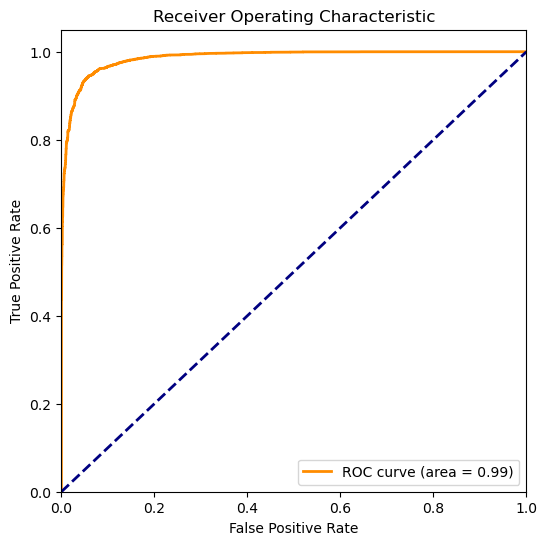

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Precision Recall Curve**

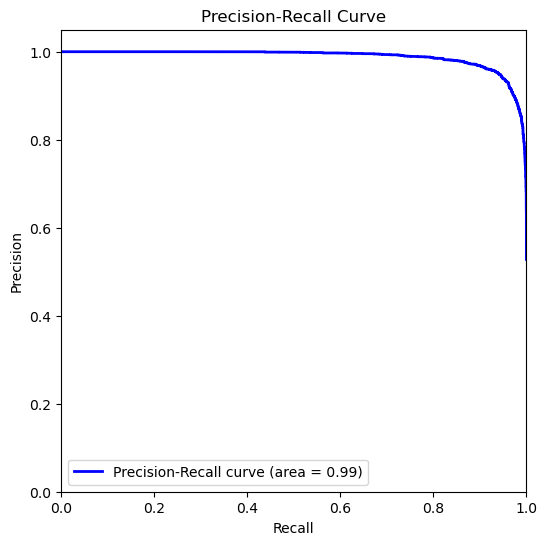

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Generate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


**Confusion Matrix**

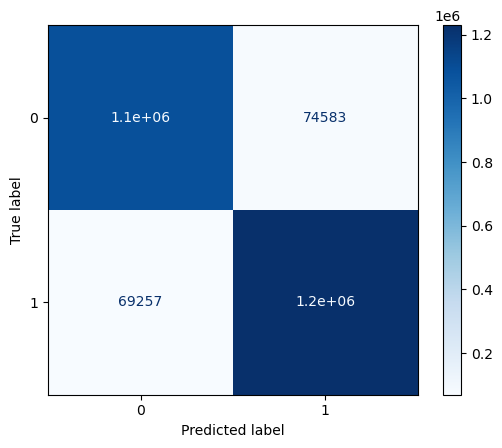

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred_class = model.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
